Question 1 — What is Simple Linear Regression?

Simple Linear Regression models the relationship between a single independent variable
𝑋
X and a dependent variable
𝑌
Y with a straight line:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝜀
Y=β
0
	​

+β
1
	​

X+ε

where
𝛽
0
β
0
	​

 is the intercept,
𝛽
1
β
1
	​

 is the slope, and
𝜀
ε is the error term. The model estimates
𝛽
0
,
𝛽
1
β
0
	​

,β
1
	​

 using least squares minimizing the sum of squared residuals.

Question 2 — Key assumptions of Simple Linear Regression

Linearity: The mean of
𝑌
Y is a linear function of
𝑋
X.

Independence: Observations (and errors) are independent.

Homoscedasticity: Constant variance of errors across all
𝑋
X.

Normality of errors: Errors are normally distributed (mainly important for inference).

No measurement error (in X) and correct model specification: no omitted important predictor, no wrong functional form.

(For multiple regression add: no perfect multicollinearity among predictors.)

Question 3 — What is heteroscedasticity, and why is it important?

Heteroscedasticity occurs when error variances are not constant across levels of the independent variable(s) — i.e., residual spread depends on
𝑋
X or predicted values.
Why important:

Ordinary Least Squares (OLS) estimates of coefficients remain unbiased, but standard errors become incorrect → hypothesis tests and confidence intervals become unreliable.
How to detect: residuals vs fitted plot, statistical tests (Breusch–Pagan, White test).
How to address: transform target (e.g., log), use weighted least squares (WLS), use heteroscedasticity-consistent (robust) standard errors, or model variance explicitly.

Question 4 — What is Multiple Linear Regression?

Multiple Linear Regression extends simple regression to multiple predictors:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
1
+
𝛽
2
𝑋
2
+
⋯
+
𝛽
𝑝
𝑋
𝑝
+
𝜀
.
Y=β
0
	​

+β
1
	​

X
1
	​

+β
2
	​

X
2
	​

+⋯+β
p
	​

X
p
	​

+ε.

It estimates the linear effect of each
𝑋
𝑗
X
j
	​

 on
𝑌
Y while holding other predictors constant, using OLS (or other estimators)

Question 5 — What is polynomial regression and how does it differ from linear regression?

Polynomial regression models a nonlinear relationship between
𝑋
X and
𝑌
Y by using polynomial terms of
𝑋
X (e.g.,
𝑋
,
𝑋
2
,
𝑋
3
X,X
2
,X
3
) while still fitting a linear model in parameters:

𝑌
=
𝛽
0
+
𝛽
1
𝑋
+
𝛽
2
𝑋
2
+
⋯
+
𝜀
.
Y=β
0
	​

+β
1
	​

X+β
2
	​

X
2
+⋯+ε.

Difference: polynomial regression can capture curvature; ordinary (simple) linear regression can only capture straight-line relations. Note: polynomial regression is still linear in parameters (so OLS applies).

Q6: Simple Linear Regression Results
Slope (Coefficient): 1.9800
Intercept: 0.1800
R² Score: 0.9979
Mean Squared Error: 0.016800


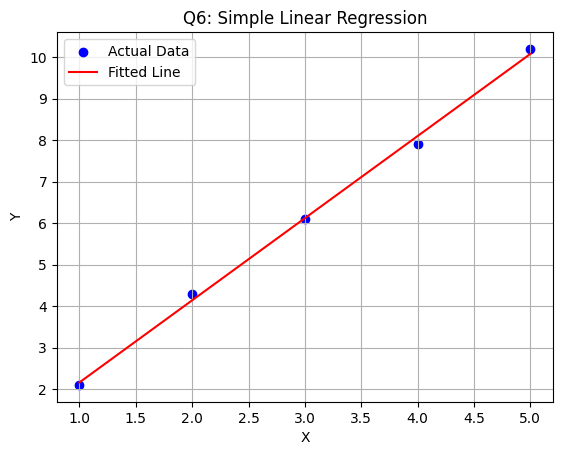

In [1]:
# Q6 – Simple Linear Regression
# Libraries required: numpy, matplotlib, scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Create and train model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Results
slope = model.coef_[0]
intercept = model.intercept_
r2 = r2_score(Y, Y_pred)
mse = mean_squared_error(Y, Y_pred)

print("Q6: Simple Linear Regression Results")
print(f"Slope (Coefficient): {slope:.4f}")
print(f"Intercept: {intercept:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.6f}")

# Plot the fitted line
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Fitted Line')
plt.title("Q6: Simple Linear Regression")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
# Q7 – Multiple Linear Regression + VIF
# Libraries required: numpy, pandas, scikit-learn

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Given data
area = np.array([1200, 1500, 1800, 2000])
rooms = np.array([2, 3, 3, 4])
price = np.array([250000, 300000, 320000, 370000])

# Create DataFrame
df = pd.DataFrame({
    "Area": area,
    "Rooms": rooms,
    "Price": price
})

# Independent (X) and dependent (Y) variables
X = df[["Area", "Rooms"]].values
y = df["Price"].values

# Fit Multiple Linear Regression
model = LinearRegression()
model.fit(X, y)
pred = model.predict(X)

# Model details
r2 = r2_score(y, pred)
print("Q7: Multiple Linear Regression Results")
print(f"Coefficient for Area: {model.coef_[0]:.4f}")
print(f"Coefficient for Rooms: {model.coef_[1]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R² Score: {r2:.4f}")

# ---- Calculate VIF manually ----
def compute_vif(df, feature):
    other_features = df.drop(columns=[feature])
    X_others = other_features.values
    y_target = df[feature].values
    reg = LinearRegression().fit(X_others, y_target)
    r2_feat = r2_score(y_target, reg.predict(X_others))
    vif = 1 / (1 - r2_feat)
    return vif

vif_area = compute_vif(df[["Area", "Rooms"]], "Area")
vif_rooms = compute_vif(df[["Area", "Rooms"]], "Rooms")

print("\nVariance Inflation Factor (VIF):")
print(f"Area:  {vif_area:.4f}")
print(f"Rooms: {vif_rooms:.4f}")


Q7: Multiple Linear Regression Results
Coefficient for Area: 63.1579
Coefficient for Rooms: 34736.8421
Intercept: 103157.8947
R² Score: 0.9986

Variance Inflation Factor (VIF):
Area:  7.7368
Rooms: 7.7368


Q8: Polynomial Regression (Degree 2)
Intercept: 0.0600
Coefficients (for [X, X²]): [1.94 0.2 ]
R² Score: 0.9993


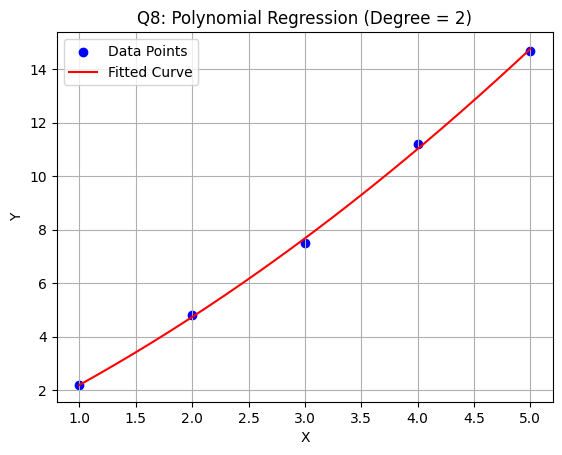

In [3]:
# Q8 – Polynomial Regression (Degree 2)
# Libraries required: numpy, matplotlib, scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Given data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Create polynomial features of degree 2: [X, X^2]
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit polynomial regression
model = LinearRegression()
model.fit(X_poly, Y)
Y_pred = model.predict(X_poly)

# Model evaluation
r2 = r2_score(Y, Y_pred)
print("Q8: Polynomial Regression (Degree 2)")
print(f"Intercept: {model.intercept_:.4f}")
print(f"Coefficients (for [X, X²]): {model.coef_}")
print(f"R² Score: {r2:.4f}")

# Plot the fitted curve
X_grid = np.linspace(1, 5, 200).reshape(-1, 1)
X_grid_poly = poly.transform(X_grid)
Y_grid_pred = model.predict(X_grid_poly)

plt.scatter(X, Y, color='blue', label='Data Points')
plt.plot(X_grid, Y_grid_pred, color='red', label='Fitted Curve')
plt.title("Q8: Polynomial Regression (Degree = 2)")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.show()


Q9: Linear Regression Results
Slope (Coefficient): 1.1500
Intercept: 6.5000
R² Score: 0.9653

Residuals (Y - Predicted):
X=10, Y=15, Pred=18.00, Residual=-3.00
X=20, Y=35, Pred=29.50, Residual=5.50
X=30, Y=40, Pred=41.00, Residual=-1.00
X=40, Y=50, Pred=52.50, Residual=-2.50
X=50, Y=65, Pred=64.00, Residual=1.00


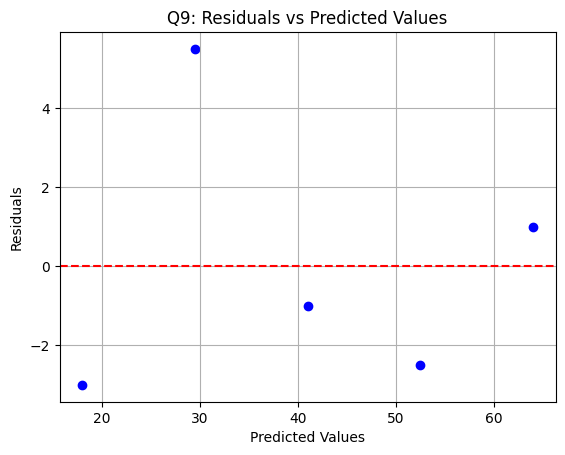


Variance of residuals (lower half): 19.7500
Variance of residuals (upper half): 6.1250
Possible heteroscedasticity detected (unequal residual spread).


In [4]:
# Q9 – Residual Plot and Heteroscedasticity Check
# Libraries required: numpy, matplotlib, scikit-learn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Given data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Fit linear regression model
model = LinearRegression()
model.fit(X, Y)

# Predictions and residuals
Y_pred = model.predict(X)
residuals = Y - Y_pred

# Print regression results
print("Q9: Linear Regression Results")
print(f"Slope (Coefficient): {model.coef_[0]:.4f}")
print(f"Intercept: {model.intercept_:.4f}")
print(f"R² Score: {r2_score(Y, Y_pred):.4f}")

# Show residuals
print("\nResiduals (Y - Predicted):")
for xi, yi, yp, r in zip(X.flatten(), Y, Y_pred, residuals):
    print(f"X={xi:2d}, Y={yi:2d}, Pred={yp:.2f}, Residual={r:.2f}")

# Plot residuals vs predicted values
plt.scatter(Y_pred, residuals, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.title("Q9: Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()

# Check for heteroscedasticity (compare variance in two halves)
mid = np.median(Y_pred)
low_var = np.var(residuals[Y_pred <= mid], ddof=1)
high_var = np.var(residuals[Y_pred > mid], ddof=1)

print(f"\nVariance of residuals (lower half): {low_var:.4f}")
print(f"Variance of residuals (upper half): {high_var:.4f}")

if abs(low_var - high_var) > 5:
    print("Possible heteroscedasticity detected (unequal residual spread).")
else:
    print("Residual variance seems roughly constant (no strong heteroscedasticity).")
